In [ ]:
! pip install pyLDAvis
! pip install kneed
!pip install pretty_html_table
!pip uninstall numpy
!pip install numpy==1.24

  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.0 which is incompatible.
Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/d

In [ ]:
import pandas as pd
import os
import re
import requests
import itertools
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import  Counter
from spacy.lang.es import stop_words
import gensim
from gensim.matutils import corpus2dense
from gensim.models import CoherenceModel
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from kneed import KneeLocator
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import pyLDAvis
import pyLDAvis.gensim
from pretty_html_table import build_table
import IPython
import spacy
spacy.cli.download('es_core_news_lg')
%matplotlib inline

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [ ]:
df = pd.read_excel("/content/df_limpia.xlsx")
print(len(df))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40513


In [ ]:
texting = df["texto_tratado"].str.split()
print(texting.head)

#genero una lista de listas para su vectorización
corpus=[[word for word in elem] for elem in texting ]
print(len(corpus))
print(corpus[0:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of 0        [gente, venir, observar, excesivo, limpieza, c...
1        [arreglar, echar, culpa, ciudadano, cargo, ani...
2                        [bache, paseo, reparacion, bache]
3                        [bache, plaza, reparacion, bache]
4                               [bache, reparacion, bache]
                               ...                        
40508    [escribir, situacion, encontrar, contenedor, a...
40509                        [farola, fundido, punto, luz]
40510    [aspersor, ribera, altura, paseo, agua, tierra...
40511    [semaforo, peatón, direccion, justo, cruce, se...
40512    [parque, menor, haber, riego, roto, aparecer, ...
Name: texto_tratado, Length: 40513, dtype: object>
40513
[['gente', 'venir', 'observar', 'excesivo', 'limpieza', 'centro', 'agua', 'llover', 'video', 'demostrar', 'necesario', 'agua', 'mayoria', 'gente', 'ciudad', 'ciudad', 'agua'], ['arreglar', 'echar', 'culpa', 'ciudadano', 'cargo', 'animal', 'sacar', 'necesidad', 'de

In [ ]:

#utilizare la libreria gensim para analizar los tópicos más frecuentes que se pueden obtener analizando los textos tratados
#creo el diccionario
dictionary = gensim.corpora.Dictionary(corpus)
print(len(dictionary.keys()))

#lo filtro según la frecuencia de apariciones en el texto de los tokens
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(len(dictionary.keys()))

#genero una bolsa de palabras
modelo_bow = [dictionary.doc2bow(token_list) for token_list in corpus]
print(modelo_bow[0:10])

word_counts = [[(dictionary[id], count) for id, count in line] for line in modelo_bow]
print(word_counts[0])

#convierto el modelo de bolsa de palabras en un conjunto de vectores
modelo_tfidf = gensim.models.TfidfModel(modelo_bow)
tfidf_docs = modelo_tfidf[modelo_bow]
print(tfidf_docs[0])

#por último construyo el modelo LDA que ofrecerá como resultado los tópicos del estudio
model_lda = gensim.models.LdaModel(corpus=modelo_bow, num_topics=10, id2word=dictionary)
print(model_lda.show_topics(20))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1692
1692
[[(0, 3), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(6, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(39, 1), (51, 2), (52, 1)], [(51, 2), (52, 1), (53, 1)], [(51, 2), (52, 1)], [(51, 2), (52, 1)], [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(30, 1), (32, 1), (53, 1), (65, 1), (66, 1)], [(27, 1), (49, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(51, 2), (52, 1)]]
[('agua', 3), ('centro', 1), ('ciudad', 2), ('demostrar', 1), ('excesivo', 1), ('gente', 

In [ ]:
topics = model_lda.show_topics(num_topics=10, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['parque', 'año', 'barrio', 'perro', 'niño', 'piscina', 'ciudad', 'cesped', 'persona', 'espacio']
Topic: 1
Words: ['ruido', 'edificio', 'vecino', 'vivienda', 'agua', 'ventana', 'terraza', 'comunidad', 'piso', 'noche']
Topic: 2
Words: ['parque', 'arbol', 'infantil', 'roto', 'agua', 'niño', 'riesgo', 'bache', 'tormenta', 'reparacion']
Topic: 3
Words: ['paso', 'señal', 'acera', 'arbol', 'obra', 'silla', 'peatón', 'rueda', 'año', 'mejora']
Topic: 4
Words: ['hora', 'policia', 'queja', 'ver', 'trabajo', 'julio', 'vecino', 'pasar', 'caso', 'sanear']
Topic: 5
Words: ['linea', 'cauce', 'solicitar', 'parada', 'autobus', 'muerte', 'servicio', 'obra', 'caso', 'respuesta']
Topic: 6
Words: ['plaza', 'aparcamiento', 'aparcar', 'abrir', 'sitio', 'espacio', 'biblioteca', 'parking', 'colocar', 'marquesina']
Topic: 7
Words: ['limpieza', 'agua', 'lleno', 'basura', 'suciedad', 'acera', 'limpiar', 'ver', 'sucio', 'pasar']
Topic: 8
Words: ['vehiculo', 'coche', 'carril', 'pasar', 'acera', 'pas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mido la Perplexity del modelo, cuanto más baja mejor
print('\nPerplexity: ', model_lda.log_perplexity(modelo_bow))


#Mido su  Coherence
coherence_model_lda = CoherenceModel(model=model_lda, texts= corpus ,dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.805219545695503

Coherence Score:  0.507902209490884


In [ ]:
#Conla librería pyLDAvis obtengo una representación interactiva de los tópicos obtenidos
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_lda, modelo_bow, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


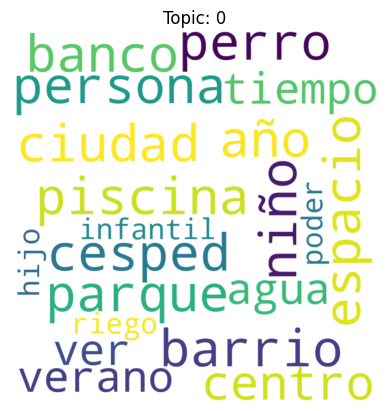

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


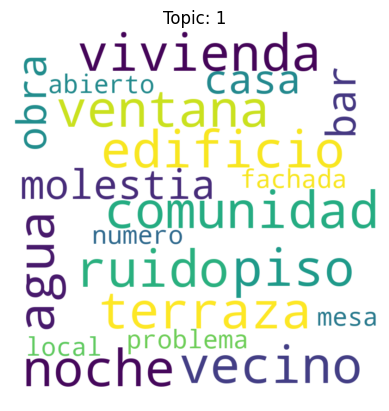

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


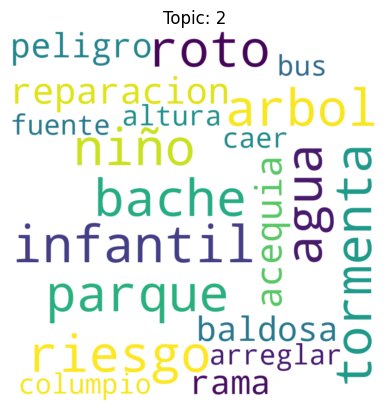

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


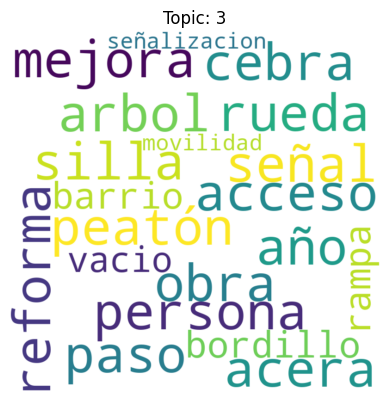

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


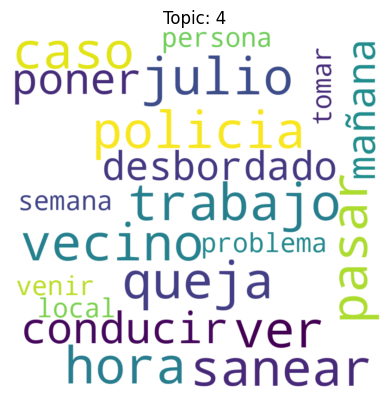

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


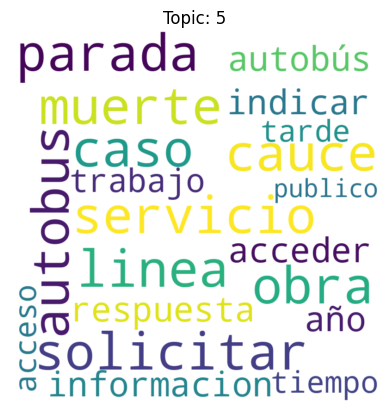

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


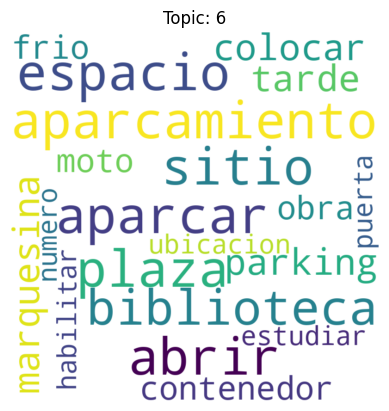

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


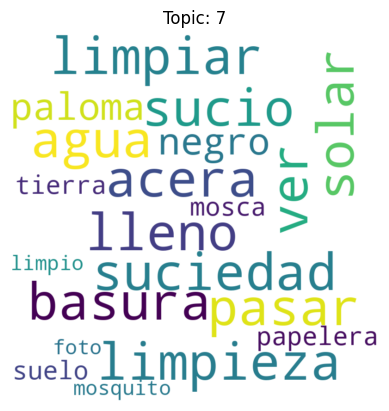

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


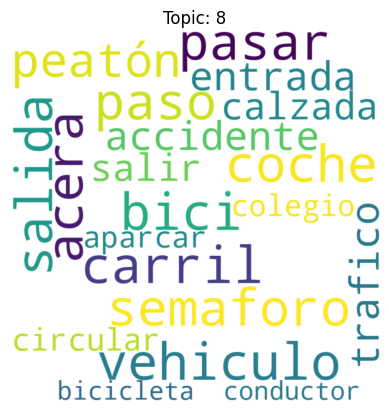

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


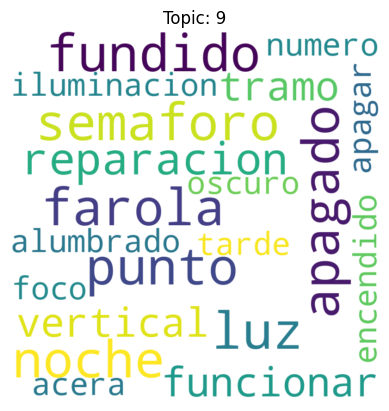

In [ ]:
for topic_id, topic in enumerate(model_lda.print_topics(num_topics=10, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(background_color='white', width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [ ]:
#con este código construyo un array numpy que luego utilizaré para concatenar al dataframe original
all_topics = model_lda.get_document_topics(modelo_bow, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)
all_topics_df.idxmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        0
1        0
2        2
3        2
4        2
        ..
40508    8
40509    9
40510    0
40511    8
40512    2
Length: 40513, dtype: int64

In [ ]:
#creo un dataframe con el array numpy anterior
df_docs_topics = pd.DataFrame(all_topics_df.idxmax(axis=1), columns=['topic'])

#lo uno al dataframe en estudio
df_con_topics = df.join(df_docs_topics)

#agrupo las filas del dataframe por el codigo de servicio, su nombre y el topic asignado.
reclasif = df_con_topics.groupby(["service_name","service_code", "topic"], as_index = False).size().sort_values(["topic","size"], ascending = False).groupby('topic').head(3)
output= build_table(reclasif, 'blue_light')
IPython.display.HTML(output)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


service_name,service_code,topic,size
Alumbrado Publico,5144577,9,2409
Movilidad Urbana: Semáforos Fundidos,1000008,9,502
Movilidad Urbana: Señalización,1000007,9,205
Movilidad Urbana: Señalización,1000007,8,1336
Infraestructuras:Conservacion,4849669,8,1186
Policia Local,4849666,8,865
Limpieza Pública,4849672,7,2400
Parques y Jardines,4849671,7,859
Instituto Mpal. Salud Publica,5144579,7,216
Limpieza Pública,4849672,6,796


In [ ]:


#Aqui hare uso del modelo KMeans no supervisado  para agrupar los tópicos según sus características
num_docs = dictionary.num_docs
num_terms = len(dictionary.keys())

#transformamos la matriz sparse
modelo_dense = corpus2dense(tfidf_docs, num_terms, num_docs)

#creamos el modelo
modelo_kmeans = KMeans(n_clusters=8)
#lo aplicamos a la matriz densa de vectores y obtenemos los clusters
clusters = modelo_kmeans.fit_predict(modelo_dense.T)
print(pd.Series(clusters).value_counts())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    20600
6     7210
3     3371
5     2811
7     2508
2     2415
1     1049
4      549
Name: count, dtype: int64


In [ ]:
#Por medio de esta función imprimimos los tópicos obtenidos y las 10 palabras más representativas de cada uno de ellos

def muestra_n_palabras_kmeans(modelo, caracteristicas, n_palabras):
    dictx = {}
    order_centroids = modelo.cluster_centers_.argsort()[:, ::-1]
    for i in range(modelo.n_clusters):

        lista=[]
        for ind in order_centroids[i, :n_palabras]:
            lista.append(f'{caracteristicas[ind]}')

        dictx[str(i)]= lista


    return(dictx)

print(muestra_n_palabras_kmeans(modelo_kmeans, list(dictionary.token2id.keys()), 10))
columns =  ['limpieza', 'baches', 'farolas', 'parques', 'semaforos', 'contenedores', 'señalizacion', 'árboles']
df_clusters = pd.DataFrame(muestra_n_palabras_kmeans(modelo_kmeans, list(dictionary.token2id.keys()), 10) )
df_clusters.columns= columns

output= build_table(df_clusters, 'blue_light')
IPython.display.HTML(output)

#muestra_n_palabras_kmeans(modelo_kmeans, list(dictionary.token2id.keys()), 10)

{'0': ['agua', 'barrio', 'año', 'limpieza', 'vecino', 'pasar', 'persona', 'tarde', 'servicio', 'queja'], '1': ['bache', 'reparacion', 'paseo', 'plaza', 'solicito', 'puente', 'aragon', 'señora', 'ciudadania', 'rotonda'], '2': ['luz', 'punto', 'farola', 'apagado', 'fundido', 'alumbrado', 'fundida', 'noche', 'funcionar', 'encender'], '3': ['parque', 'infantil', 'niño', 'perro', 'columpio', 'juego', 'roto', 'fuente', 'agua', 'jugar'], '4': ['semaforo', 'fundido', 'reparacion', 'paseo', 'posicion', 'correcto', 'conductor', 'colocar', 'roto', 'plaza'], '5': ['contenedor', 'basura', 'cubo', 'lleno', 'papel', 'recogida', 'bolsa', 'organico', 'vidrio', 'reciclaje'], '6': ['carril', 'paso', 'señal', 'acera', 'peatón', 'vehiculo', 'coche', 'baldosa', 'bici', 'vertical'], '7': ['arbol', 'rama', 'poda', 'podar', 'tapar', 'plantar', 'situado', 'caer', 'año', 'acera']}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


limpieza,baches,farolas,parques,semaforos,contenedores,señalizacion,árboles
agua,bache,luz,parque,semaforo,contenedor,carril,arbol
barrio,reparacion,punto,infantil,fundido,basura,paso,rama
año,paseo,farola,niño,reparacion,cubo,señal,poda
limpieza,plaza,apagado,perro,paseo,lleno,acera,podar
vecino,solicito,fundido,columpio,posicion,papel,peatón,tapar
pasar,puente,alumbrado,juego,correcto,recogida,vehiculo,plantar
persona,aragon,fundida,roto,conductor,bolsa,coche,situado
tarde,señora,noche,fuente,colocar,organico,baldosa,caer
servicio,ciudadania,funcionar,agua,roto,vidrio,bici,año
queja,rotonda,encender,jugar,plaza,reciclaje,vertical,acera


In [ ]:
#aqui evalúo la inertia del modelo en función del número de clústers objetivo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42, }

sse = []
for k in range(5, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(modelo_dense.T)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#con la librería Kneelocator obtenemos el nº de clusters óptimo, 8.
kl = KneeLocator(range(5, 15), sse, curve="convex", direction="decreasing")

print(kl.elbow)

8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['cluster'] = pd.Series(clusters, index=df.index)
print(df.cluster.head())
print(len(df.cluster))

0    0
1    0
2    1
3    1
4    1
Name: cluster, dtype: int32
40513


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

codigos_clusters = [0, 1, 2, 3, 4, 5, 6, 7]
nombres_clusters = ['limpieza', 'baches', 'farolas', 'parques', 'semaforos', 'contenedores', 'señalizacion', 'árboles']
diccionario = dict(zip(codigos_clusters, nombres_clusters))
df['nombre_cluster'] = df['cluster'].map(diccionario)
dfx =df[['title', 'nombre_cluster']][0:10]
output= build_table(dfx, 'blue_light')
IPython.display.HTML(output)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,nombre_cluster
desmesurado gasto de agua,limpieza
vergonzoso,limpieza
Baches en el paseo de la Constitución con la calle Isaac Peral,baches
Baches en la plaza San Miguel,baches
Baches en la calle Miguel Servet con el Camino de Cabaldós,baches
Baches en la calle Espoz y Mina con la calle Don Jaime I,baches
Limpieza calle las Huertas en Casetas es la que une casetas con Utebo,limpieza
Propuesta,limpieza
Conservación del asfalto en calle Carlos Saura,limpieza
Baches en la avenida Valencia con la calle Avila,baches


In [ ]:
#agrupo las filas del dataframe por el codigo de servicio, su nombre y el topic asignado.
reclasif = df.groupby(["service_name","service_code", "nombre_cluster"], as_index = False).size().sort_values(["nombre_cluster","size"], ascending = False).groupby('nombre_cluster').head(3)
output= build_table(reclasif, 'blue_light')
IPython.display.HTML(output)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


service_name,service_code,nombre_cluster,size
Parques y Jardines,4849671,árboles,2355
Limpieza Pública,4849672,árboles,51
Infraestructuras:Conservacion,4849669,árboles,32
Infraestructuras:Conservacion,4849669,señalizacion,2264
Movilidad Urbana: Señalización,1000007,señalizacion,1967
Policia Local,4849666,señalizacion,886
Movilidad Urbana: Semáforos Fundidos,1000008,semaforos,525
Movilidad Urbana: Regulación Semáforos,103677952,semaforos,15
Alumbrado Publico,5144577,semaforos,8
Parques y Jardines,4849671,parques,2615
